# Data Exploration: Distances

Exploring euclidean distances between facial points caputred by nuiCapture as candidate features.
<p>
    <img src="nuicapture.png">
    <em>Source: CadavidConcepts</em>
</p>

In [3]:
import glob as gl
import numpy as np
from scipy.io import loadmat
from typing import List
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib notebook  

In [4]:
def labelname(file_name):
    label = file_name.replace("data/points/sample", "").lower()
    return label.replace(".mat", "")


class Signal:
    def __init__(self, x, y, label):
        self.x = x
        self.y = y
        self.label = label


def sig_values(sig):
    res = np.zeros((np.shape(sig.x)[0], np.shape(sig.x)[1] * 2))
    res[:, ::2] = sig.x
    res[:, 1::2] = sig.y

    return res

def dst(sig, p, q):
    frame_x = np.split(sig.x, 5, axis=1)
    frame_y = np.split(sig.y, 5, axis=1)

    nframes, nrecs, idx = np.shape(frame_x)
    eucdist = np.zeros((nframes, nrecs))

    for f in range(nframes):
        for r in range(nrecs):
            u = frame_x[f][r][p], frame_y[f][r][p]
            v = frame_x[f][r][q], frame_y[f][r][q]
            eucdist[f][r] = distance.euclidean(u, v)

    return eucdist

In [5]:
files = gl.glob("data/points/*.mat")  # type: list
signals = []  # type: List[Signal]

for f in files:
    data = loadmat(f).get('pontosSinal')
    signals.append(Signal(data[:, ::2], data[:, 1::2], labelname(f)))

n_recs, n_x = np.shape(signals[0].x)

In [4]:
# shape: [signal][frame][rec]
nose_eyebrows = []  # 6 to 3
nose_chin = []   # 6 to 11
mouth_width = []  # 65 to 32
mouth_height = []  # 8 to 9
eyebrows_external = []  # 49 to 16
eyebrows_midpoint_upper = []  # 50 to 17
cheeks = []  # 91 to 92
eyes_height_right = [] # 20 to 25
eyes_height_left = [] # 53 to 58

for s in signals:
    nose_eyebrows.append(dst(s, 6, 3))  # 6 to 3
    nose_chin.append(dst(s, 6, 11))  # 6 to 11
    mouth_width.append(dst(s, 65, 32))  # 65 to 32
    mouth_height.append(dst(s, 8, 9))  # 8 to 9
    eyebrows_external.append(dst(s, 49, 16))  # 49 to 16
    eyebrows_midpoint_upper.append(dst(s, 50, 17))  # 50 to 17
    cheeks.append(dst(s, 92, 91))  # 92 to 91
    eyes_height_right.append(dst(s, 25, 20)) # 20 to 25
    eyes_height_left.append(dst(s, 53, 58)) # 53 to 58

<IPython.core.display.Javascript object>


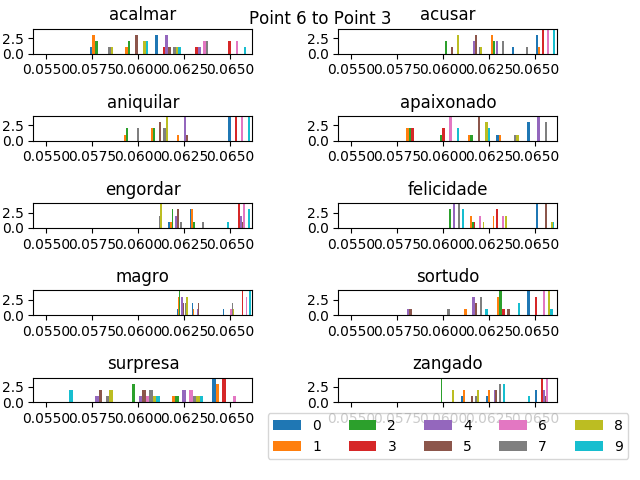

In [5]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(nose_eyebrows[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(nose_eyebrows), np.amax(nose_eyebrows)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 6 to Point 3')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


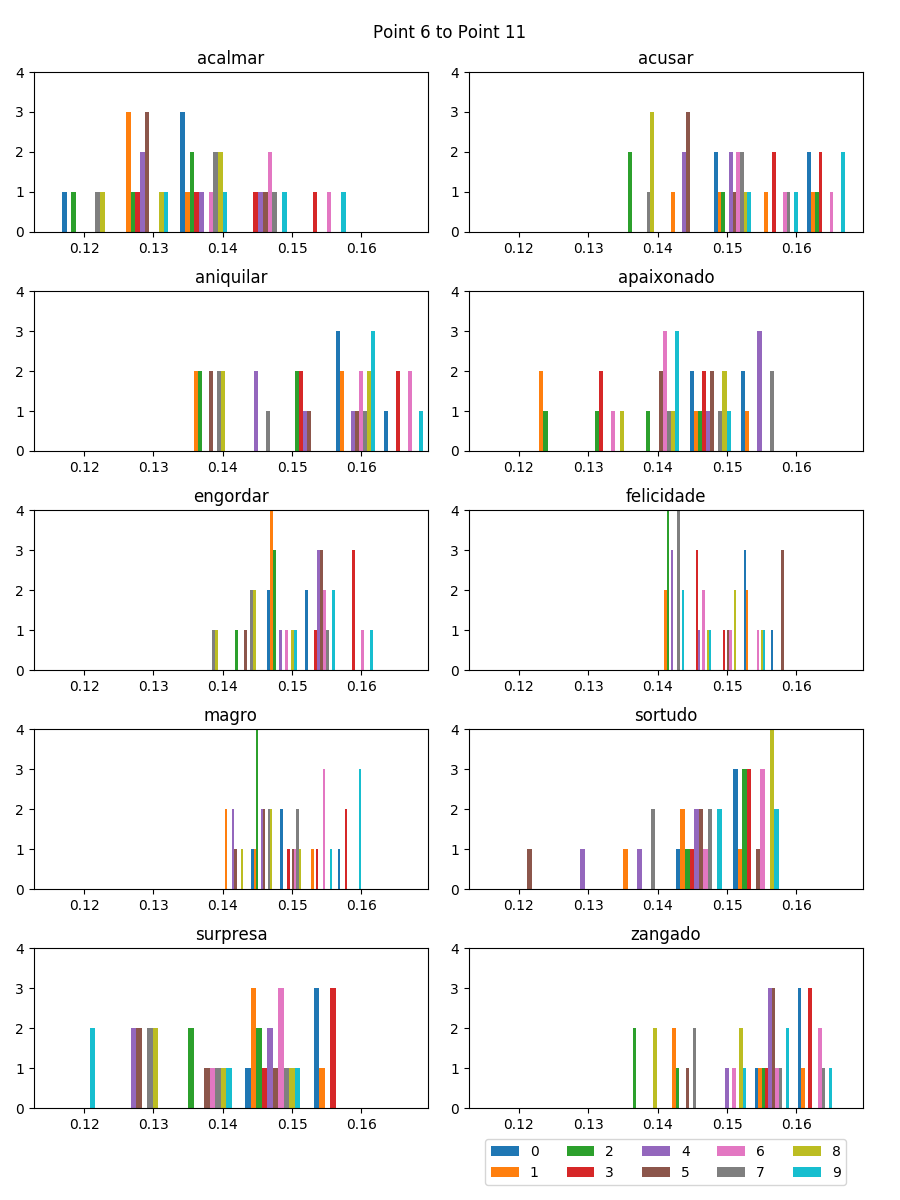

In [6]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(nose_chin[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(nose_chin), np.amax(nose_chin)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 6 to Point 11')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


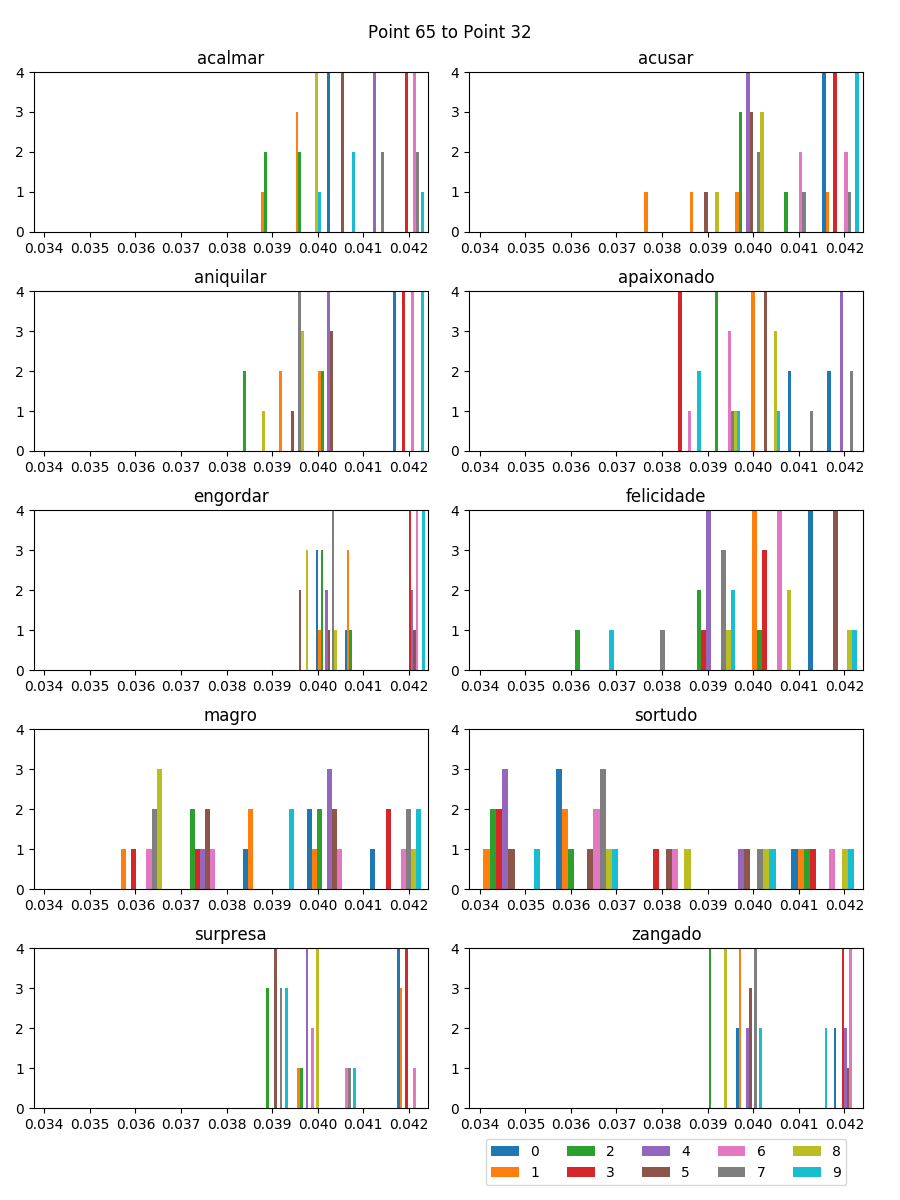

In [7]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(mouth_width[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(mouth_width), np.amax(mouth_width)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 65 to Point 32')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


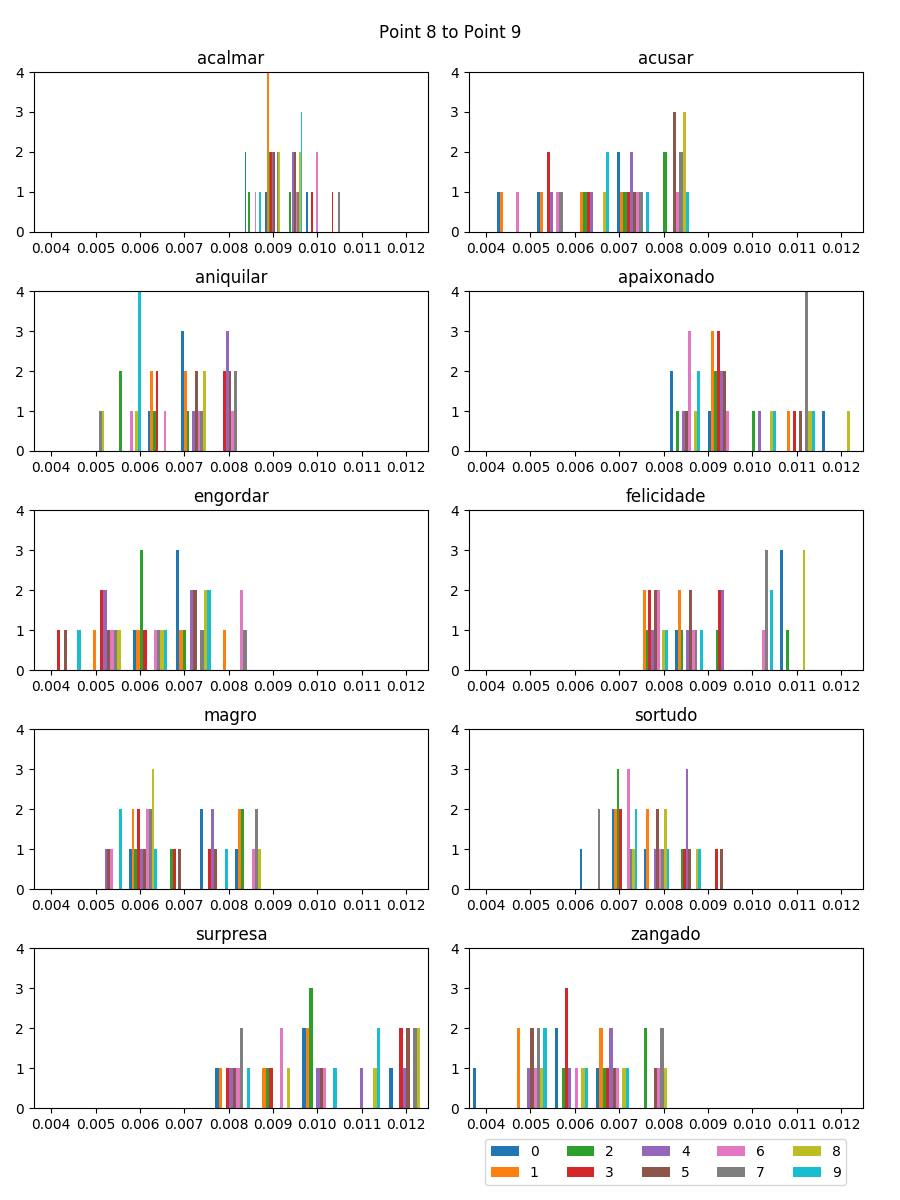

In [8]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(mouth_height[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(mouth_height), np.amax(mouth_height)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 8 to Point 9')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


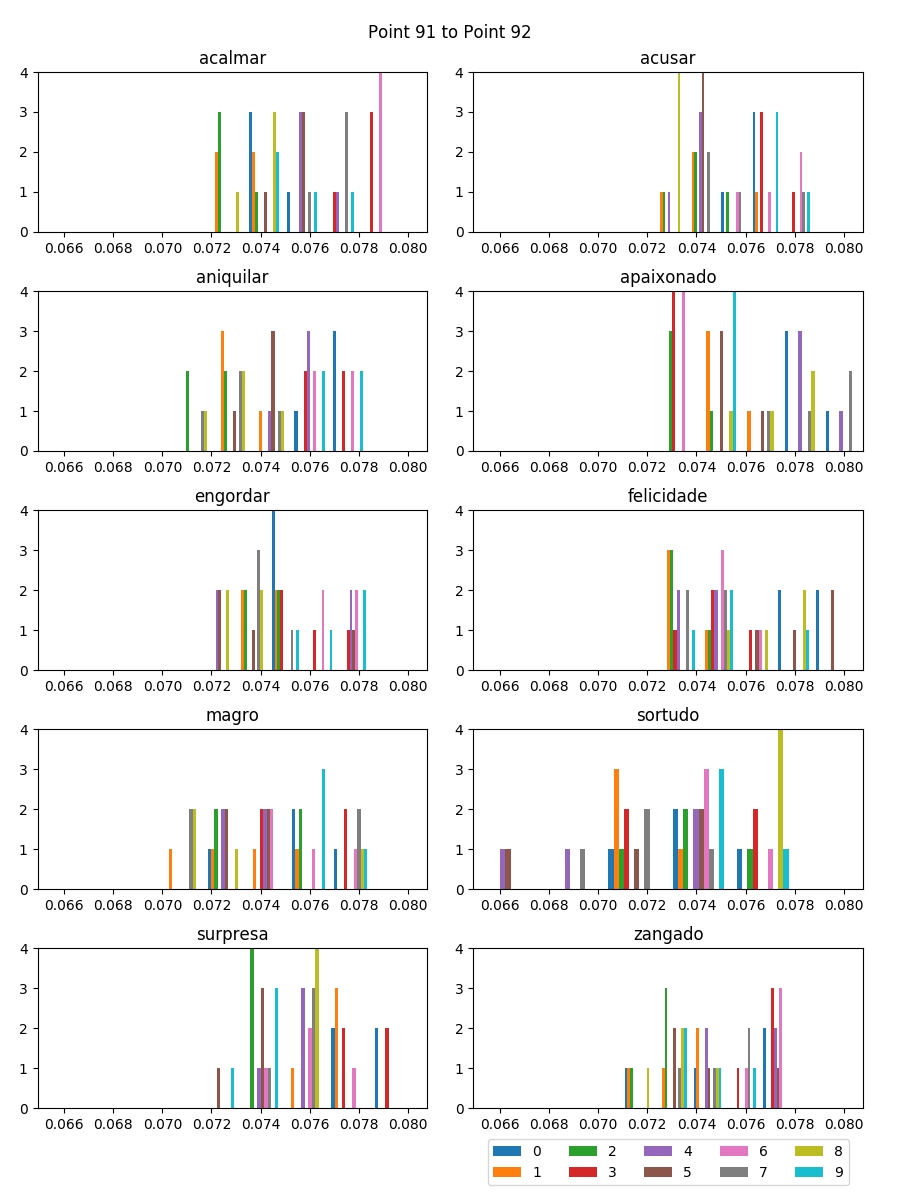

In [9]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(cheeks[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(cheeks), np.amax(cheeks)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 91 to Point 92')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


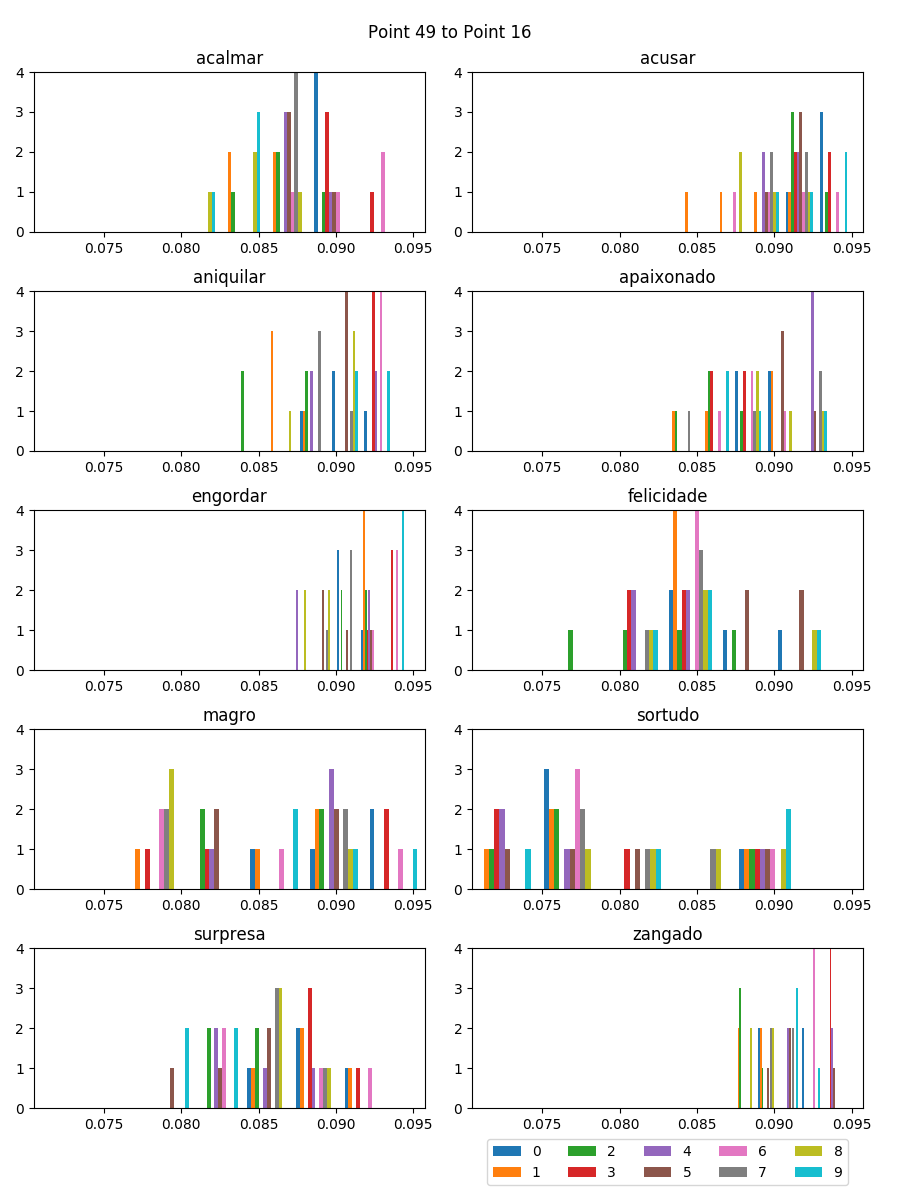

In [10]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(eyebrows_external[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(eyebrows_external), np.amax(eyebrows_external)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 49 to Point 16')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


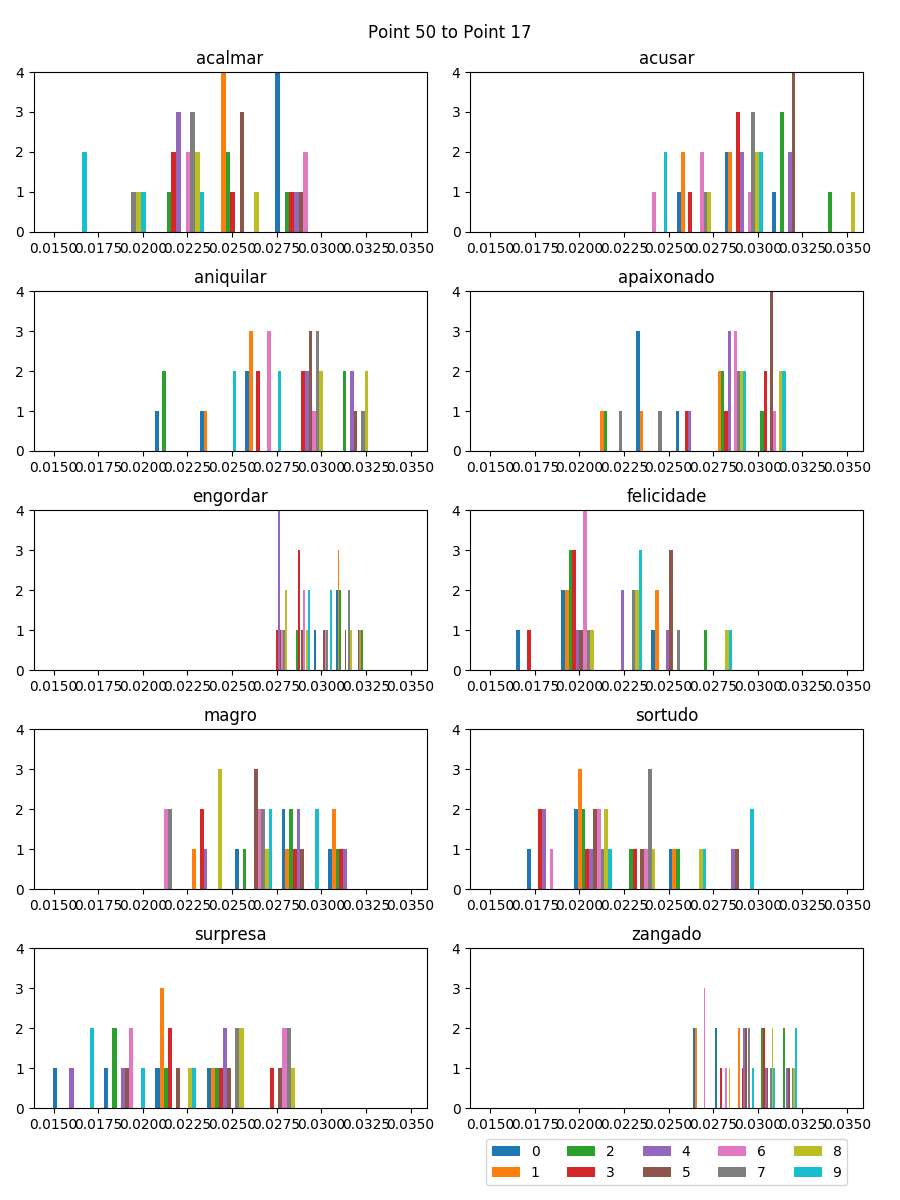

In [11]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(eyebrows_midpoint_upper[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(eyebrows_midpoint_upper), np.amax(eyebrows_midpoint_upper)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 50 to Point 17')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


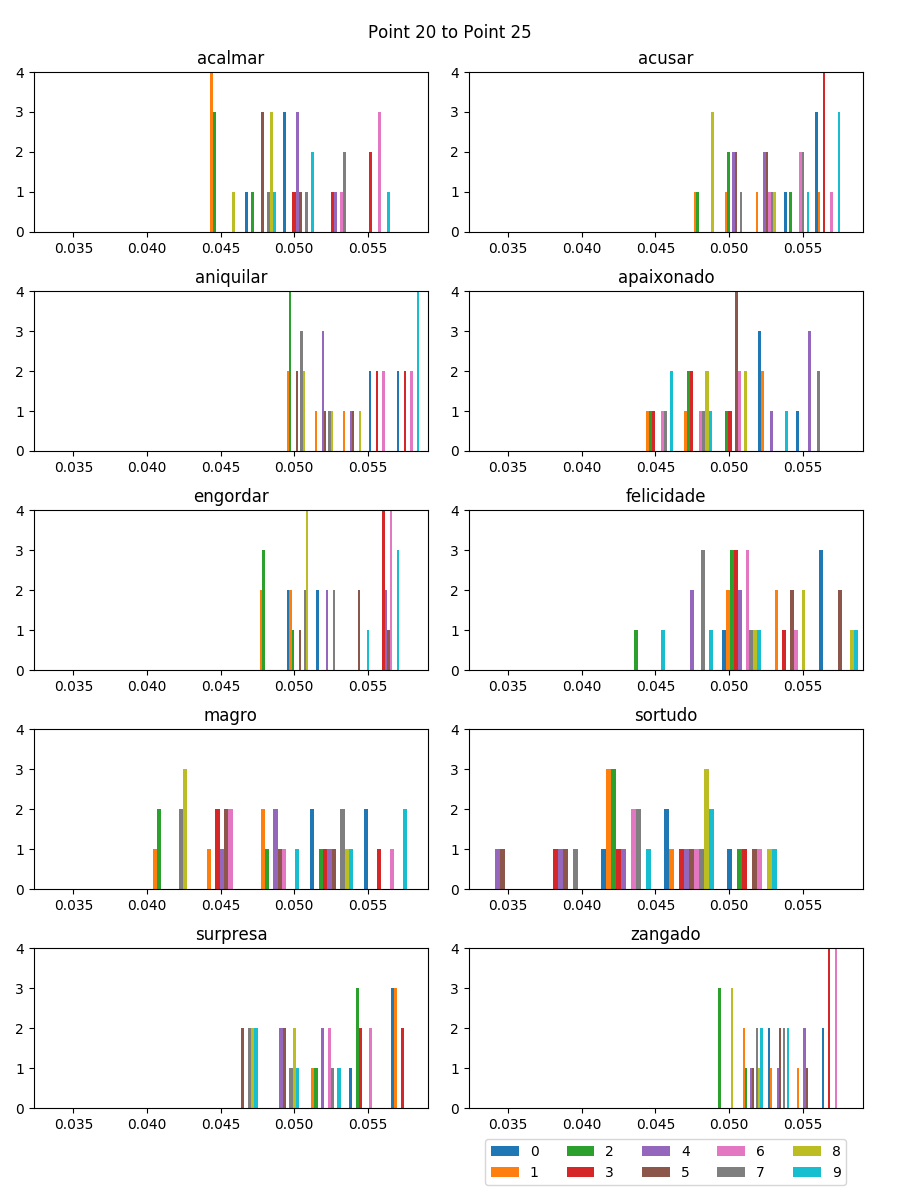

In [12]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(eyes_height_right[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(eyes_height_right), np.amax(eyes_height_right)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 20 to Point 25')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

<IPython.core.display.Javascript object>


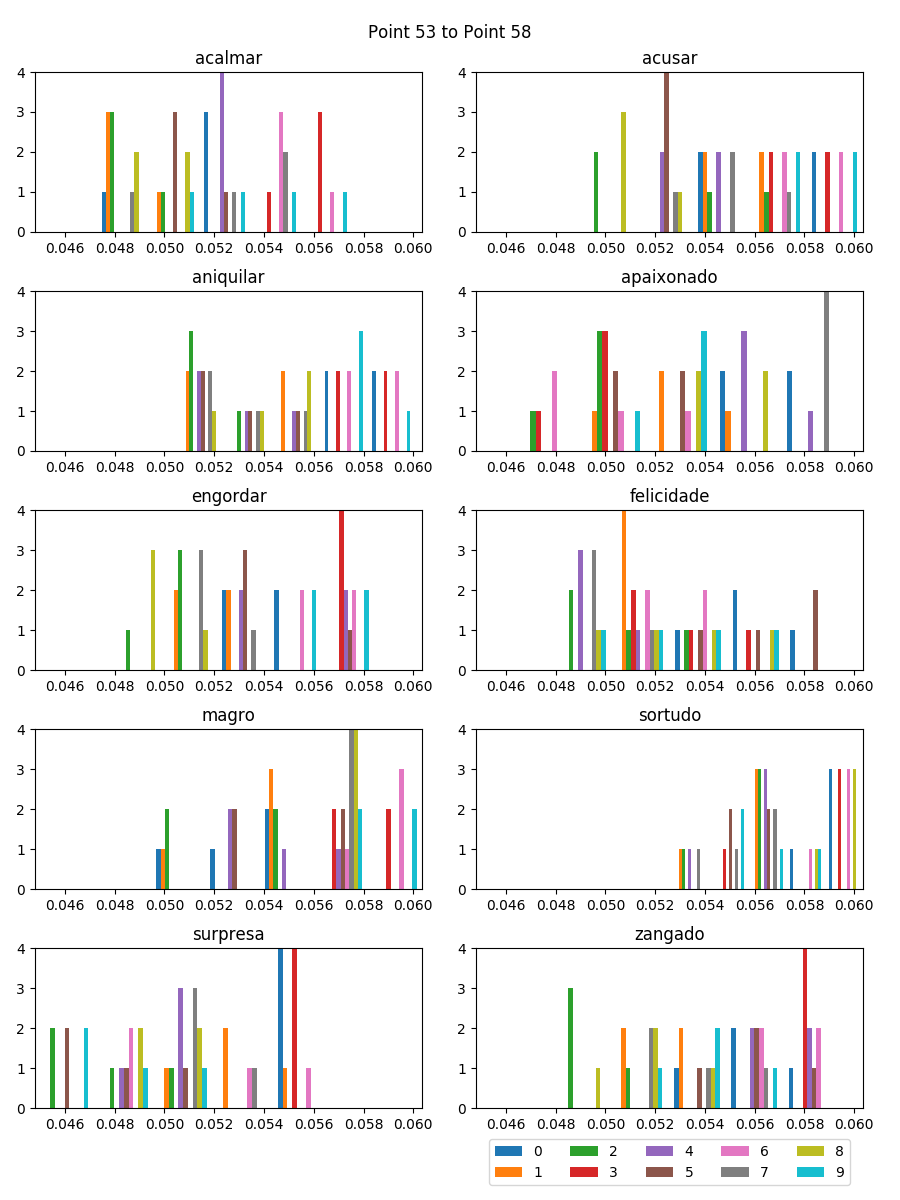

In [13]:
ax = []
fig, axes = plt.subplots(nrows=5, ncols=2)
ax = axes.flatten()

for i in range(len(ax)):
    ax[i].hist(eyes_height_left[i][0:4][0:9], bins=5, label=range(11))
    ax[i].set_title(signals[i].label)
    ax[i].set_xlim([np.amin(eyes_height_left), np.amax(eyes_height_left)])
    ax[i].set_ylim([0,4])

fig.suptitle('Point 53 to Point 58')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5)
plt.rcParams['figure.figsize'] = [9, 12]
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()